In [1]:
# ! python -m pip install --upgrade pip
# ! pip3 install tensorflow==2.10.0

import tensorflow as tf
tf.__version__


# https://www.tensorflow.org/tutorials/customization/basics?hl=ko

'2.10.0'

In [2]:
import numpy as np

### tf.Tensor: 텐서 객체
#### 텐서는 다차원 배열로 넘파이(NumPy) ndarray 객체와 비슷하며,
#### tf.Tensor 객체는 데이터 타입과 크기를 가지고 있다.
#### 또한 tf.Tensor는 GPU 같은 가속기 메모리에 상주할 수 있다.
#### 텐서플로는 텐서를 생성하고 이용하는 풍부한 연산 라이브러리(tf.add, tf.matmul, tf.linalg.inv 등.)를 제공하며
#### 연산수행 시 자동으로 텐서를 파이썬 네이티브(native) 타입으로 변환하여 연산한다

In [3]:
# 상수 : tf.constant()
s = tf.constant(50)
print(s)

a = tf.constant([[1.,2.],
                 [3.,4.]])
b = tf.constant([[1.,1.],
                 [0.,1.]])
c = tf.matmul(a,b)  # 내적곱
print(c)

tf.Tensor(50, shape=(), dtype=int32)
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [4]:
# 변수 : tf.Variable()
# 초기 값이 미리 설정,주로 텐서플로 내부에서 연산시 변경되는 변수에 사용,weight과 bias
a = tf.Variable(100)
b = tf.Variable(200)
c = tf.add(a,b)
print(c)
print(tf.square(5))
print(tf.reduce_sum([1,2,3]))
print(tf.reduce_mean([1,2,3]))

tf.Tensor(300, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [5]:
# Tensor객체를 ndarray로 변환
# 속성과 타입 변환
a = tf.constant([[1.,2.],
                 [3.,4.]])
print(a)
n = a.numpy()
print(n,type(n))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
[[1. 2.]
 [3. 4.]] <class 'numpy.ndarray'>


### Linear Regression(선형 회귀)

In [6]:
# 데이터 읽어오기
xy = np.loadtxt('data-01-cars.csv',delimiter=',',skiprows=1,unpack=True)
x_train = xy[0]
y_train = xy[1]
print(x_train.shape,y_train.shape)

(50,) (50,)


In [7]:
# 변수 초기화 : weight, bias
# tf.random.normal([1]) : 난수를 1개를 생성
W = tf.Variable(tf.random.normal([1]),name='weight')
b = tf.Variable(tf.random.normal([1]),name='bias')

In [8]:
# 예측 함수(hypothesis) : H(X) = W*X + b
def hypothesis(X):
    return X*W + b

In [9]:
# 비용 함수 : (Hx - y)^2 의 평균
def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [10]:
# 경사 하강법
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
# optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

In [11]:
# 학습 시작
print('***** Start Learning!!')
for step in range(10001):
    optimizer.minimize(cost_func,var_list=[W,b])

    if step % 100 == 0:
        print('%04d'%step,'cost:[',cost_func().numpy(),']',
             ' W:',W.numpy(),' b:',b.numpy())
    
print('***** Learning Finished!!')     

***** Start Learning!!
0000 cost:[ 3377.087 ]  W: [-0.50752956]  b: [-0.29102206]
0100 cost:[ 268.25702 ]  W: [2.7480547]  b: [2.319108]
0200 cost:[ 262.94437 ]  W: [2.8421416]  b: [1.0287187]
0300 cost:[ 257.0464 ]  W: [2.9357383]  b: [-0.56961507]
0400 cost:[ 251.1883 ]  W: [3.0384412]  b: [-2.3218868]
0500 cost:[ 245.80717 ]  W: [3.144478]  b: [-4.131234]
0600 cost:[ 241.14522 ]  W: [3.2495155]  b: [-5.923678]
0700 cost:[ 237.29947 ]  W: [3.3502498]  b: [-7.6428013]
0800 cost:[ 234.26309 ]  W: [3.4442468]  b: [-9.247028]
0900 cost:[ 231.96219 ]  W: [3.529834]  b: [-10.707771]
1000 cost:[ 230.28625 ]  W: [3.6060047]  b: [-12.007841]
1100 cost:[ 229.11215 ]  W: [3.672329]  b: [-13.139875]
1200 cost:[ 228.32108 ]  W: [3.728856]  b: [-14.104712]
1300 cost:[ 227.80867 ]  W: [3.7760203]  b: [-14.909734]
1400 cost:[ 227.48979 ]  W: [3.8145392]  b: [-15.567205]
1500 cost:[ 227.29933 ]  W: [3.8453243]  b: [-16.092663]
1600 cost:[ 227.1903 ]  W: [3.8693888]  b: [-16.50342]
1700 cost:[ 227.130

In [12]:
# 회귀 계수, weight과 bias 출력
print('Weight:',W.numpy())
print('Bias:',b.numpy())
# H(X) = 3.9304893*X - 17.581043

Weight: [3.9304893]
Bias: [-17.581043]


In [16]:
# 예측
print('***** Predict')
# 속도가 30과 50일 때 제동 거리를 예측해 보세요
print('speed=30, dist=',hypothesis(30).numpy())
print('speed=50, dist=',hypothesis(50).numpy())
# X = [10,11,12,24,25] 일때
print('speed=[10,11,12,24,25], dist=',hypothesis([10,11,12,24,25]).numpy())

***** Predict
speed=30, dist= [100.33363]
speed=50, dist= [178.94342]
speed=[10,11,12,24,25], dist= [21.72385  25.654339 29.584827 76.7507   80.68118 ]


C:\Users\storm\anaconda3\envs\tf210\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


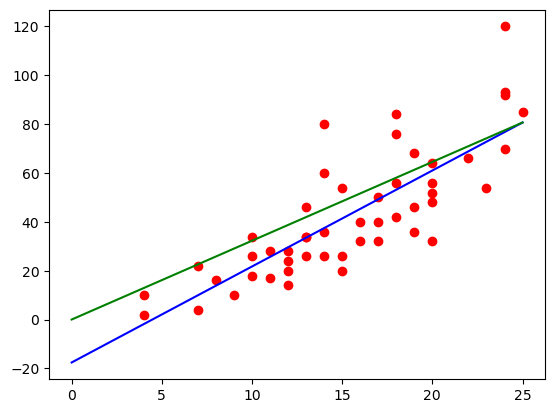

In [20]:
# 시각화 : matplotlib 사용
import matplotlib.pyplot as plt

def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro')  # 원본 데이터 , Red color
plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b')  # 예측함수 , Blue color
plt.plot((0,25),(0,prediction(25,W,b)),'g')